In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Get list of items in ../csv_sst/ directory
vari2 = 'sst'
variable = '12-01'

# misc
misc = True if vari2 == 'sst' else False

In [3]:
# Define the color range
vmin = np.nan
vmax = np.nan

csv_files = os.listdir(f'../csv_{vari2}/')

# Create list
new_csv = [file for file in csv_files if variable in file]
print(f'Length of new_csv: {len(new_csv)}')

# Only keep the last 10 items
new_csv = new_csv[-10:]
print(f'New length of new_csv: {len(new_csv)}')

Length of new_csv: 53
New length of new_csv: 10


Data saved to ./data/sst_12-01.xlsx


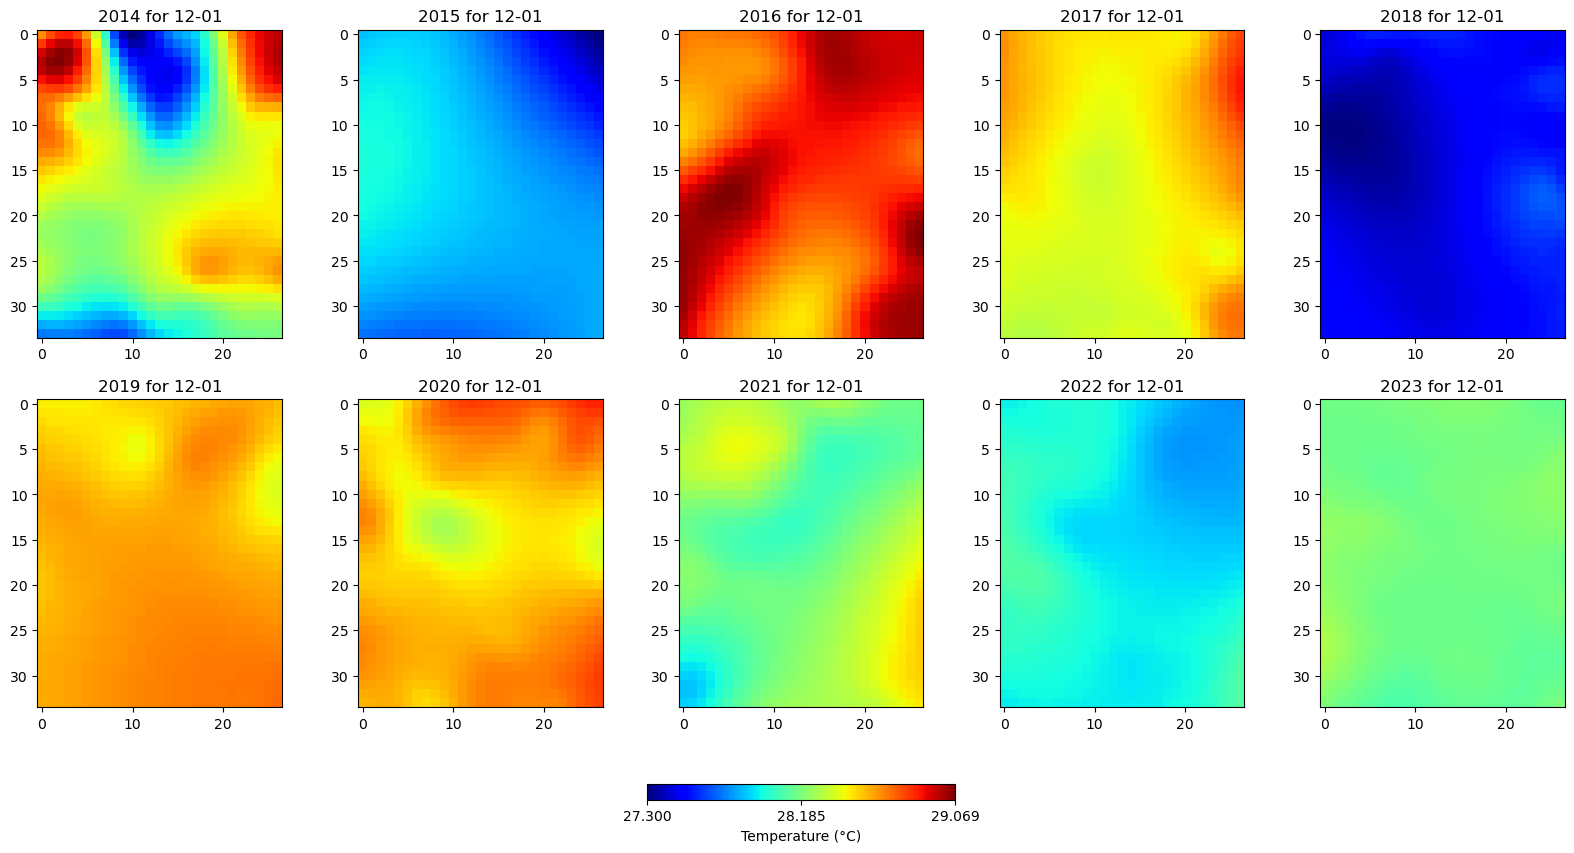

In [4]:
# Assuming new_csv is a list of your CSV file names
# Load the dataframes
dataframes = [pd.read_csv(f'../csv_{vari2}/{file}', index_col=0) for file in new_csv]

# Convert from Kelvin to Celsius
if misc: dataframes = [data - 273.15 for data in dataframes]

# Save each dataframe in a single excel document on separate sheets
with pd.ExcelWriter(f'./data/all_{vari2}_{variable}.xlsx') as writer:
    for i, data in enumerate(dataframes):
        data.to_excel(writer, sheet_name=new_csv[i][0:4])

print(f'Data saved to ./data/{vari2}_{variable}.xlsx')

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Plot each dataframe
for i, ax in enumerate(axs.flat):
    data = dataframes[i]
    
    # Do np.flip on the data.
    # data = np.flip(data, axis=0)
    
    # Check to see if any values in here are below vmin or above vmax, and if so, set the vmin or vmax to the min or max value in the data
    if np.min(data) < vmin or np.isnan(vmin):
        vmin = np.min(data)
    if np.max(data) > vmax or np.isnan(vmax):
        vmax = np.max(data)
    
    cax = ax.imshow(data, cmap='jet', vmin=vmin, vmax=vmax)
    ax.set_title(f'{new_csv[i][0:4]} for {new_csv[i][5:7]}-{new_csv[i][8:10]}')

# Add a single colorbar for all subplots
cbar = fig.colorbar(cax, ax=axs, orientation='horizontal', fraction=0.02, pad=0.1)
if misc: cbar.set_label('Temperature (°C)')
else: cbar.set_label('DHW')
cbar.set_ticks([vmin, np.mean([vmin, vmax]), vmax])

plt.show()


Average of the non-nan values in "analysed_sst": 28.40312957763672


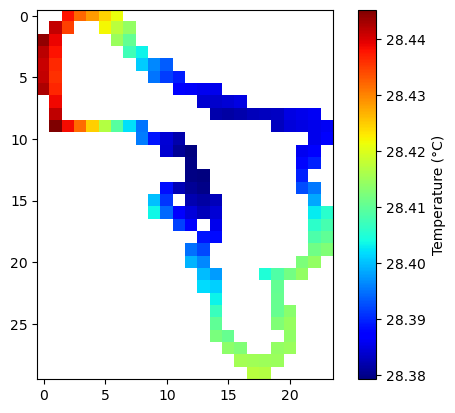

In [5]:
# Read in ../hrcs_mmm.nc using netcdf4
import netCDF4 as nc

# Load the data
data = nc.Dataset('../hrcs_mmm.nc')

# Extract variable from the data.
analysed_sst = data['variable'][:]

# Plot the data
plt.imshow(analysed_sst, cmap='jet')

# Colorbar
plt.colorbar(label='Temperature (°C)')

# Print the average of the non-nan values in "analysed_sst"
print(f'Average of the non-nan values in "analysed_sst": {np.nanmean(analysed_sst)}')